In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_ring = "E:\\YNU\\5\\OpenSourceGIS\\Act_5\\OnClass\\chenggong_utm48.tif"

### geo_transform: (左上角x，像元宽度，行旋转参数，左上角y，列旋转参数，像元高度)

In [3]:
dset = gdal.Open(path_ring) ##读入遥感影像
x_size, y_size, num_bands = dset.RasterXSize, dset.RasterYSize, dset.RasterCount ##分别获取遥感影像不同维度尺寸，如列数、行数及波段数
print(x_size, y_size, num_bands)

band_nir = dset.GetRasterBand(4) ## 获取影像的第四波段（近红外波段）
print(band_nir)

band_nir_array = band_nir.ReadAsArray() ## 将波段数据读入数组,波段读入为np.array(格式
print(band_nir_array)

band_nir_array.shape ## 获取数组形状，即数组的维度信息（行数, 列数）

geo_trans = dset.GetGeoTransform() ## 获取地理转换参数
print(geo_trans)

proj = dset.GetProjection() ## 获取投影信息
print(proj)

2875 3379 6
<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x000001B36386E100> >
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(268167.02525260474, 10.421454790528236, 0.0, 2765453.1872716597, 0.0, -9.543567381150961)
PROJCS["WGS 84 / UTM zone 48N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32648"]]


e:\anaconda3\envs\geoenv\Lib\site-packages\osgeo\gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


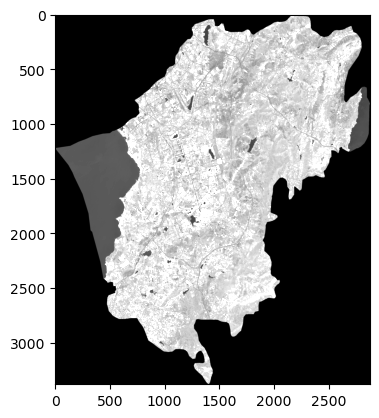

In [4]:
plt.figure()
plt.imshow(band_nir_array, vmax = 4000, vmin = 0, cmap = 'gray')

In [5]:
path_out = "E:\\YNU\\5\\OpenSourceGIS\\Act_5\\OnClass\\nir_chenggong_utm48.tif"
driver = gdal.GetDriverByName("GTiff")
outdset = driver.Create(path_out, 
                        band_nir_array.shape[1],  # xsize
                        band_nir_array.shape[0],  # ysize
                        1,  # bands
                        gdal.GDT_Int16)  # eType
outdset.SetGeoTransform(geo_trans)
outdset.SetProjection(proj)
outband = outdset.GetRasterBand(1) ## 提取出第1个波段（空的）
outband.WriteArray(band_nir_array) ## 写入数据
outband.SetNoDataValue(np.nan) ## 设置无效值
outdset = None